In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [40]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.4.1


In [44]:
class PrintDot(tf.keras.callbacks.Callback):
    """
    Display training progress by printing a single dot for
    each completed epoch.
    """

    def on_epoch_end(self, epoch, logs) -> None:
        """
        `on_epoc_end` hook to take the epoch number and logs.
        This will run whenever the training loop finishes an epoch.
        """
        if epoch % 100 == 0:
            print("", flush=True)
        print(".", end="", flush=True)


In [35]:
np.random.seed(1234)

In [36]:

x = np.linspace(-1, 1, 100).reshape(-1, 1)  # x data (tensor), shape=(100, 1)
y = np.power(x, 2) + 0.2*np.random.rand(x.shape[0]).reshape(-1,1)                 # noisy y data (tensor), shape=(100, 1)
# y = 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)


In [37]:
x.shape

(100, 1)

In [38]:
y.shape

(100, 1)

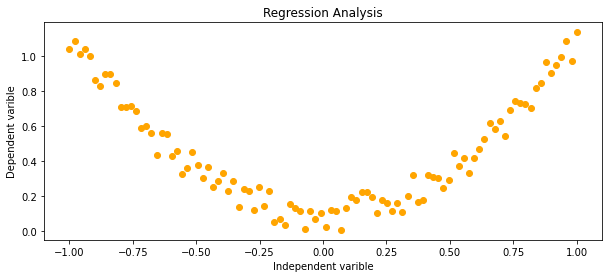

In [39]:

# view data
plt.figure(figsize=(10,4))
plt.scatter(x, y, color = "orange")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()


In [84]:
def build_and_compile_model(input_shape, n_hidden, output_shape):
    model = keras.Sequential([
      layers.InputLayer(input_shape=input_shape),
      layers.Dense(n_hidden, activation='relu'),
      layers.Dense(n_hidden, activation='relu'),
      layers.Dense(n_hidden, activation='relu'),
      layers.Dense(output_shape)
    ])

    model.compile(loss='mse',
                optimizer=tf.keras.optimizers.Adam(0.002))
    return model

In [85]:
model = build_and_compile_model(1, 320, 1)

In [86]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 320)               640       
_________________________________________________________________
dense_21 (Dense)             (None, 320)               102720    
_________________________________________________________________
dense_22 (Dense)             (None, 320)               102720    
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 321       
Total params: 206,401
Trainable params: 206,401
Non-trainable params: 0
_________________________________________________________________


In [87]:
%%time
history = model.fit(x, y, batch_size=20, epochs=10000, callbacks=[PrintDot()], verbose=0)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

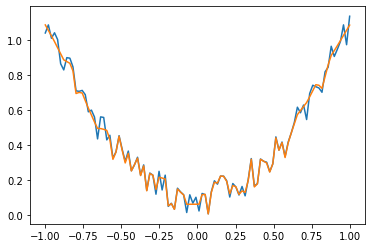

In [89]:
plt.figure()
plt.plot(x, y)
plt.plot(x, model.predict(x))

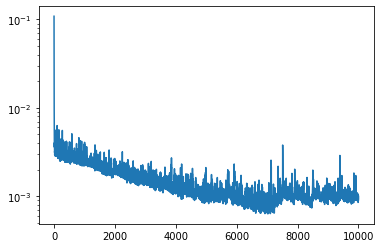

In [90]:
plt.figure()
plt.plot(history.history['loss'])
plt.yscale('log')

# comparing with model fitted for batch_size=20 but trained for 5 times longer so total number of weight updates is the same i think

In [61]:
model2 = build_and_compile_model(1, 320, 1)

In [62]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 320)               640       
_________________________________________________________________
dense_13 (Dense)             (None, 320)               102720    
_________________________________________________________________
dense_14 (Dense)             (None, 320)               102720    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 321       
Total params: 206,401
Trainable params: 206,401
Non-trainable params: 0
_________________________________________________________________


In [63]:
%%time
history2 = model2.fit(x, y, batch_size=20, epochs=5*10000, callbacks=[PrintDot()], verbose=0)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

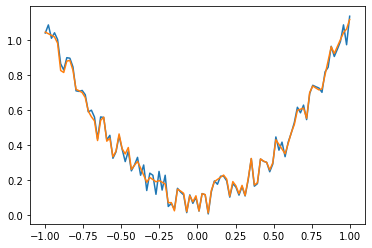

In [64]:
plt.figure()
plt.plot(x, y)
plt.plot(x, model2.predict(x))

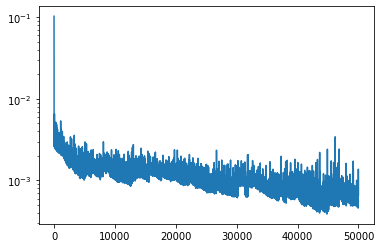

In [65]:
plt.figure()
plt.plot(history2.history['loss'])
plt.yscale('log')

# comparison

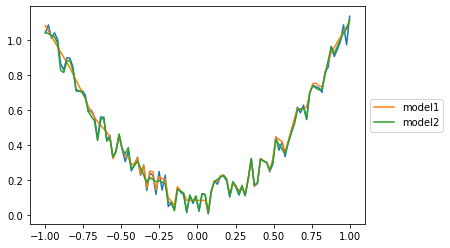

In [66]:
plt.figure()
plt.plot(x, y)
plt.plot(x, model.predict(x), label='model1')
plt.plot(x, model2.predict(x), label='model2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

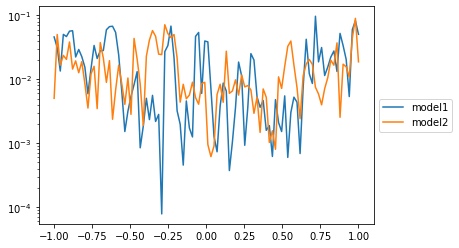

In [92]:
plt.figure()
plt.plot(x, np.abs(y - model.predict(x)), label='model1')
plt.plot(x, np.abs(y - model2.predict(x)), label='model2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')

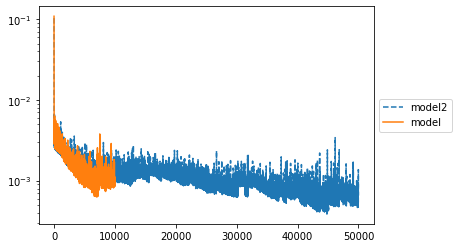

In [91]:
plt.figure()
plt.plot(history2.history['loss'], label='model2', ls='--')
plt.plot(history.history['loss'], label='model')
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# model3 - same as model1 but for 5 times longer training

In [104]:
model3 = build_and_compile_model(1, 320, 1)

In [105]:
model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 320)               640       
_________________________________________________________________
dense_33 (Dense)             (None, 320)               102720    
_________________________________________________________________
dense_34 (Dense)             (None, 320)               102720    
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 321       
Total params: 206,401
Trainable params: 206,401
Non-trainable params: 0
_________________________________________________________________


In [106]:
%%time
history3 = model3.fit(x, y, batch_size=20, epochs=50000, callbacks=[PrintDot()], verbose=0)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

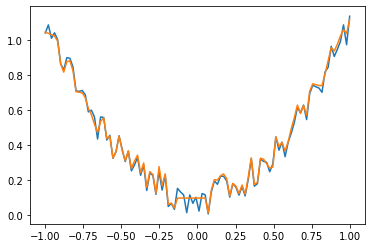

In [107]:
plt.figure()
plt.plot(x, y)
plt.plot(x, model3.predict(x))

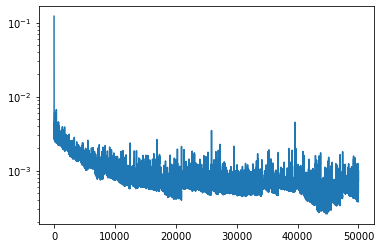

In [108]:
plt.figure()
plt.plot(history3.history['loss'])
plt.yscale('log')

# comparison 1,2,3

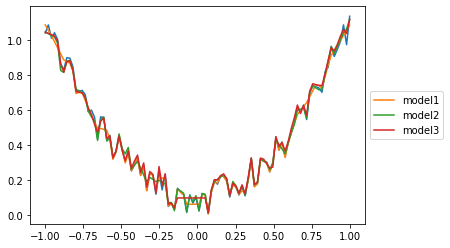

In [109]:
plt.figure()
plt.plot(x, y)
plt.plot(x, model.predict(x), label='model1')
plt.plot(x, model2.predict(x), label='model2')
plt.plot(x, model3.predict(x), label='model3')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

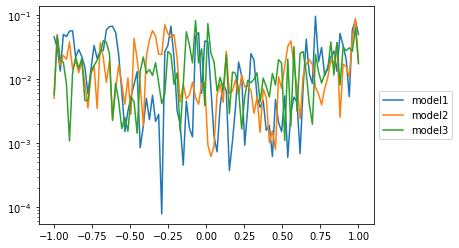

In [110]:
plt.figure()
plt.plot(x, np.abs(y - model.predict(x)), label='model1')
plt.plot(x, np.abs(y - model2.predict(x)), label='model2')
plt.plot(x, np.abs(y - model3.predict(x)), label='model3')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')

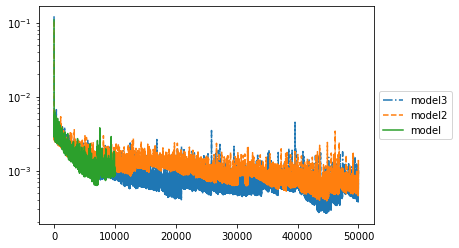

In [112]:
plt.figure()
plt.plot(history3.history['loss'], label='model3', ls='-.')
plt.plot(history2.history['loss'], label='model2', ls='--')
plt.plot(history.history['loss'], label='model')
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))